In [1]:
import cvxpy as cp 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

17.323567853865637


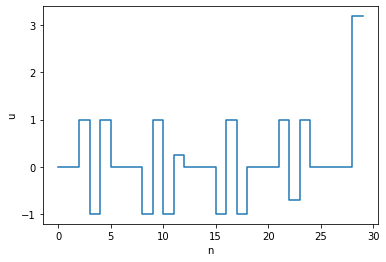

In [3]:
n = 3
N = 30 
u = cp.Variable(N)
X = cp.Variable((n,N+1))
t = cp.Variable(N)
A = np.array([[-1,0.4,0.8],[1,0,0],[0,1,0]])
b = np.array([1,0,0.3])
x_des = np.array([7,2,-6])
x0 = np.array([0,0,0])
constraint = [] 
for i in np.arange(N):
    constraint +=[
        X[:,i+1] == A@X[:,i] + b*u[i],
        u[i]<=t[i],
        u[i]>=-t[i],
        u[i]<=(t[i]+1)/2,
        u[i]>=-(t[i]+1)/2,
    ]
constraint += [
    X[:,0] == x0,
    X[:,N] ==x_des
]

prob = cp.Problem(cp.Minimize(cp.sum(t)),constraints=constraint)
prob.solve()
print(sum(t.value))
plt.step(np.arange(N),u.value)
plt.xlabel("n")
plt.ylabel("u")
plt.show()